# Microflows and nanoflows. A very brief Introduction
## by **Robert Castilla**
## CATMEch - Dpt. of Fluid Mechanics
## Universitat Politècnica de Catalunya

***

## Laminar flows and fundamentals of lubrication

For a correct development of this lecture, a review of viscous flows (Couette and Hagen-Poiseullie flows and similar) studied in previous courses of Introductory Fluid Mechanics is advised.

This section is focused on fluid flows at very small scales. This is the basis of the technological field known as [Microfluidics](https://en.wikipedia.org/wiki/Microfluidics).

At very small scales, with confined or semi-confined flows, Reynolds number is commonly very small even with high velocities or low viscosities. For example, for a small journal bearing, say 5mm diameter, spinning at 1500 rpm, with a clearance of 0.1 mm, even with water, Reynolds number is
$$ \text{Re} = \frac{\omega d c}{2\nu} $$

Now we integrate the linear equation

In [1]:
from IPython.display import display, Markdown
import sympy as sp
sp.init_printing()

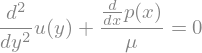

In [2]:
x,y,t,mu = sp.symbols('x,y,t,mu')
u = sp.Function('u')
p = sp.Function('p')
h = sp.Function('h')
exp = 1/mu*sp.diff(p(x),x)+sp.diff(u(y),y,2)
sp.Eq(exp,0)

We define the top and bottom velocities and the boundary conditions, by means of a dictionary

In [3]:
Ub,Ut = sp.symbols('U_b,U_t')
ics = {u(0):Ub,u(h(x)):Ut}

And we solve the EDO with the defined boundary conditions

In [4]:
Sol = sp.dsolve(exp,u(y),ics=ics)

And this is the solution:

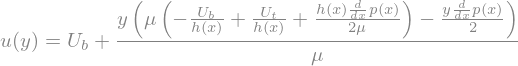

In [5]:
Sol

That can be a little bit simplified

In [6]:
Sol = Sol.simplify()

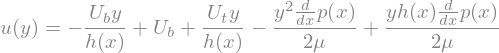

In [7]:
Sol

Let's consider, for the shake of simplicity, the case with $U_t(t) = U; U_b(t)=0$ 

In [8]:
U = sp.symbols('U')
Sol = Sol.replace(Ut,U).replace(Ub,0)

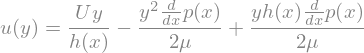

In [9]:
Sol

In order to calculate the pressure distribution, we need another condition for the velocity. This condition is the **mass balance**. The flow rate in any section $x$ must be
independent of $x$

In [10]:
intU = sp.integrate(Sol.rhs,(y,0,h(x)))

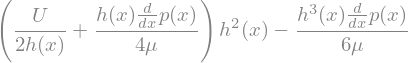

In [11]:
intU

## Reynolds equation

The [Reynolds equation](https://en.wikipedia.org/wiki/Reynolds_equation) for lubrications yields when we impose that this flow rate cannot be function of $x$ (that is continuity condition)

In [12]:
ReynoldsEq = sp.Eq(intU.diff(x),0)

In [13]:
ReynoldsEq = ReynoldsEq.expand()

In [14]:
display(Markdown(r'$$\boxed{'+sp.latex(ReynoldsEq)+'}$$ '))

$$\boxed{\frac{U \frac{d}{d x} h{\left(x \right)}}{2} + \frac{h^{3}{\left(x \right)} \frac{d^{2}}{d x^{2}} p{\left(x \right)}}{12 \mu} + \frac{h^{2}{\left(x \right)} \frac{d}{d x} h{\left(x \right)} \frac{d}{d x} p{\left(x \right)}}{4 \mu} = 0}$$ 

## Pressure distribution

To calculate the pressure distribution, we consider the solution of 

$$ q = \int_0^h u(y) \text{d} y$$

and we isolate the pressure gradient

In [15]:
q = sp.symbols('q')
p_eq = sp.Eq(p(x).diff(x), sp.solve(intU-q,p(x).diff(x))[0])

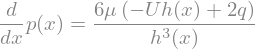

In [16]:
p_eq

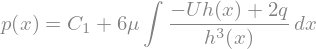

In [17]:
sp.dsolve(p_eq,p(x))

This is the general soluction for any shape for $h(x)$. The values for $q$ and the integration constant are obtained from suitable boundary conditions

### Example

Let's apply that for the linear case $h(x)=h_0(1+\alpha x/L)$, with $\alpha \ll 1$. It is the working principle of a [tilting-pad bearing](https://en.wikipedia.org/wiki/Fluid_bearing#Michell.2FKingsbury_tilting-pad_fluid_bearings)

![bearingPad](bearingPad.svg)

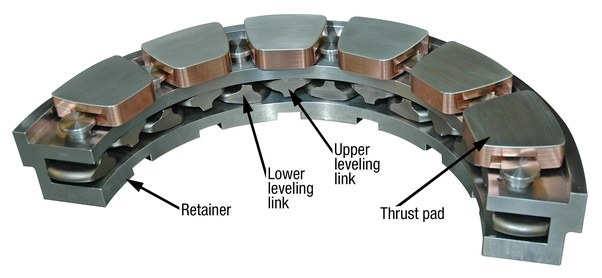


First, we replace the generic $h(x)$ by this particular case

In [18]:
h0,alpha,L = sp.symbols('h_0, alpha,L')
p_eq = p_eq.replace(h(x),h0*(1-alpha*x/L))

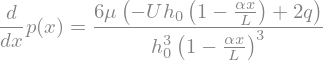

In [19]:
p_eq

Next, we integrate the pressure distribution with the proper boundary condition for $p(x=0)=p_a$

In [20]:
pa = sp.symbols('pa')

In [21]:
p_sol = sp.dsolve(p_eq,p(x),ics={p(0):pa})

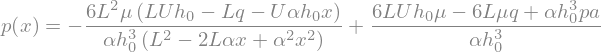

In [22]:
p_sol

The flow rate in this moving pad can be calulated with the other boundary condition, $p(x=L)=p_a$

In [23]:
q_sol = sp.solve(p_sol.replace(x,L).replace(p(L),pa),q)[0]

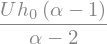

In [24]:
q_sol

and we replace again this result in the pressure distribution

In [25]:
p_sol = p_sol.replace(q,q_sol)

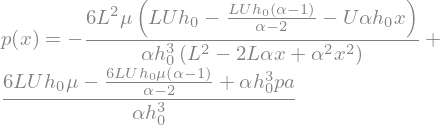

In [26]:
p_sol

Let's rearrange the terms to get it it nicer

In [27]:
p_sol = sp.Eq(p_sol.lhs-pa,p_sol.rhs-pa)

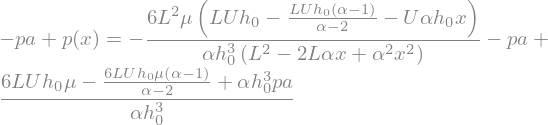

In [28]:
p_sol

This solution is complex, since it is considering all the values of $\alpha$. We can take advantage of the assumption $\alpha \ll 1$ in order to expand the right hand side in
$\alpha$ up to the first order

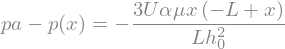

In [29]:
p_sol = sp.Eq(p_sol.lhs,p_sol.rhs.series(alpha,0,n=2).removeO())
p_sol = p_sol.simplify()
display(p_sol)

In [30]:
W = -p_sol.rhs.integrate((x,0,L))

In [31]:
from IPython.display import display, Markdown
display(Markdown(r'Load : $$ W = '+sp.latex(W)+'$$'))

Load : $$ W = - \frac{L^{2} U \alpha \mu}{2 h_{0}^{2}}$$

Remember that it is for unit lenght in the $z$ direction, so the mean (relative) pressure in this fluid film is

In [32]:
pf = sp.symbols('p_f')
pf = W/L
display(Markdown(r'Load : $$ p_f = '+sp.latex(pf)+'$$'))

Load : $$ p_f = - \frac{L U \alpha \mu}{2 h_{0}^{2}}$$

---

### Activity (very easy)

Estimate the value of the bearing number $\Lambda$ for this tilting pad

---

## Another application: journal bearing

It is possible to use the previous formulation to calculate de eccentricity a, angle of a journal bearing with fluid film lubrication, given the load $W$

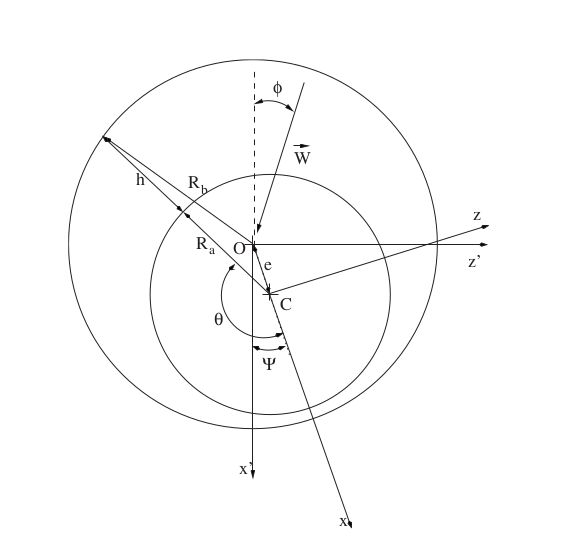

---

### Exercise:

Consider that the journal is displaced in the $x$ negative direction, so that $h(\theta) = h_0(1+\varepsilon \cos(\theta))$ where $\varepsilon=\frac{e}{h_0}$ is the relative eccentricity and $h_0 = \frac{1}{2}(D_b -D_a)$ is the average gap thickness. The journal is rotating in the positive direction of $\theta$ (polar coordinates)

1. Calculate the pressure distribution $p(\theta)$ and the value and direction of $\mathbf{W}$, in the approximation $\varepsilon \ll 1$.
2. What happens to the journal if $\mathbf{W}$ increase a little bit?
3. Apply the results to this real [example](https://www.mcmaster.com/6658K738/), and discuss the value of the maximum load given by the manufactures at this rotational velocity.
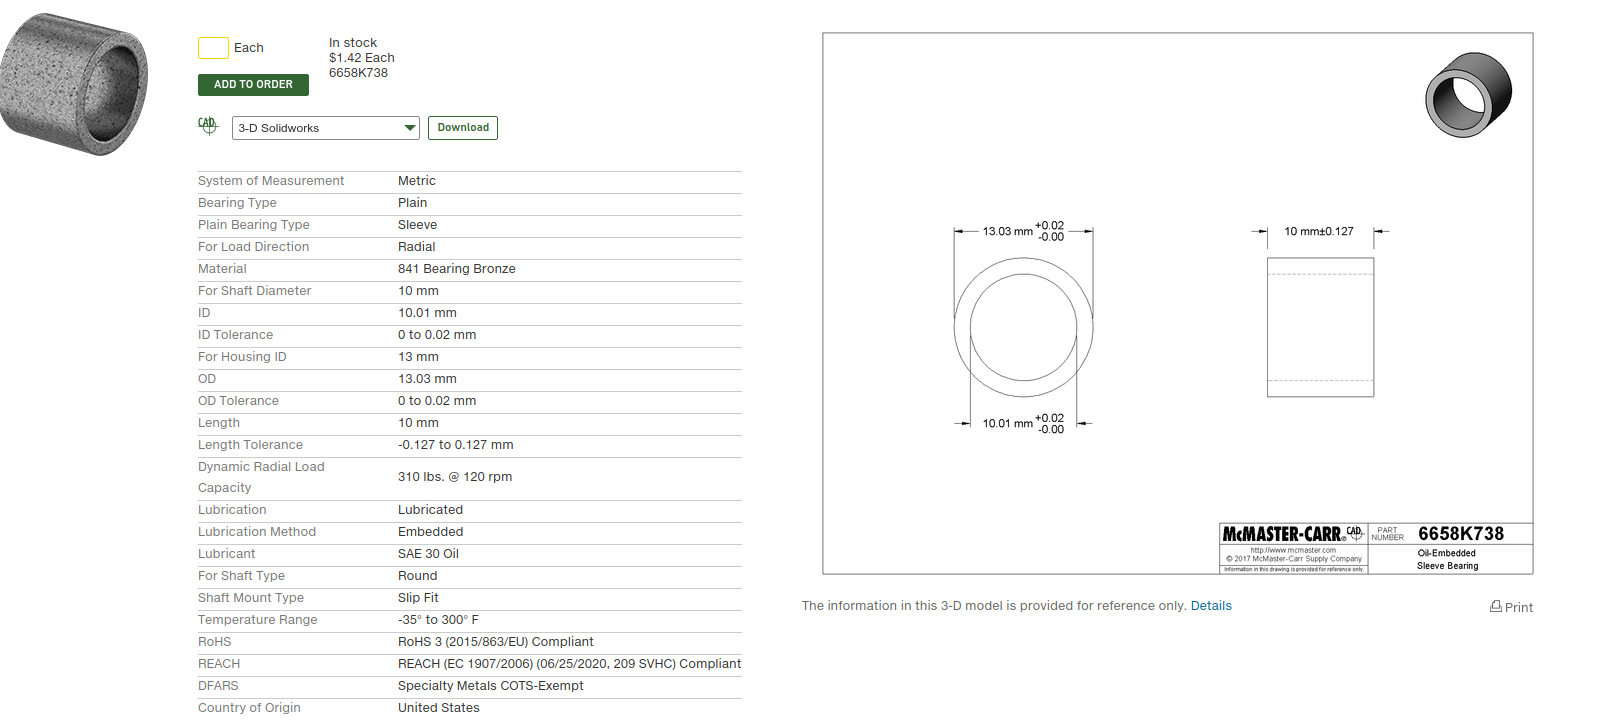

---


In [33]:
Ra,Rb,theta,epsilon,Omega = sp.symbols('R_a,R_b,theta,varepsilon,Omega')

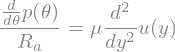

In [34]:
Stokes_equation = sp.Eq(1/Ra*p(theta).diff(theta),mu*u(y).diff(y,2))
display(Stokes_equation)

In [35]:
ics = {u(0):Ra*Omega,u(h(theta)):0}

In [36]:
uSol = sp.dsolve(Stokes_equation,u(y),ics=ics)

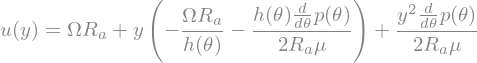

In [37]:
display(uSol)

In [38]:
intU = L*sp.integrate(uSol.rhs,(y,0,h(theta)))

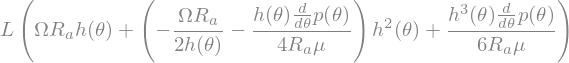

In [39]:
intU

In [40]:
p_eq = sp.Eq(p(theta).diff(theta), sp.solve(intU-q,p(theta).diff(theta))[0])

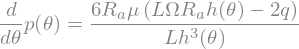

In [41]:
p_eq

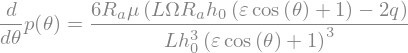

In [42]:
h0 = sp.symbols('h_0')
p_eq = p_eq.subs(h(theta),h0*(1+epsilon*sp.cos(theta)))
display(p_eq)

I takes a long time... better first order for $\varepsilon$

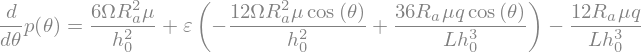

In [43]:
p_eq = sp.Eq(p_eq.lhs,p_eq.rhs.series(epsilon,0,n=2).removeO())
display(p_eq)

In [44]:
ics = {p(0):0}
pSol=sp.dsolve(p_eq,ics=ics)

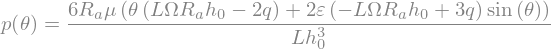

In [45]:
display(pSol)

In [46]:
qSol = sp.solve(pSol.rhs.subs(theta,0)-pSol.rhs.subs(theta,2*sp.pi),q)[0]
display(Markdown(r'$q ='+sp.latex(qSol)+'$'))

$q =\frac{L \Omega R_{a} h_{0}}{2}$

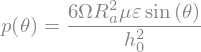

In [47]:
pSol = pSol.subs(q,qSol)
display(pSol)

In [48]:
Wx,Wy = sp.symbols('W_x,W_y')

In [49]:
Wx = sp.integrate(pSol.rhs*sp.cos(theta)*Ra,(theta,0,2*sp.pi))
Wy = sp.integrate(pSol.rhs*sp.sin(theta)*Ra,(theta,0,2*sp.pi))
display(Markdown(r'$$ \boxed{\mathbf{W} = \left('+sp.latex(Wx)+','+sp.latex(Wy)+'\\right)}$$'))

$$ \boxed{\mathbf{W} = \left(0,\frac{6 \pi \Omega R_{a}^{3} \mu \varepsilon}{h_{0}^{2}}\right)}$$

Note that the load is in the $y$ direction!

***

In dimensionless way, it is used the [Sommerfeld number](https://en.wikipedia.org/wiki/Sommerfeld_number)

In [ ]:
S = sp.symbols('S')

In [ ]:
S = (Ra/h0)**2*mu*Omega*2*Ra*L/Wy
display(S)


***

Let's apply to the case:

In [ ]:
values = {Ra:0.005,h0:1.5e-5,L:0.01,Omega:12.566,mu:0.4} 
W_value = sp.lambdify(epsilon,Wy.subs(values))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
ee = np.linspace(0,1,250)
ax.plot(ee,W_value(ee)) # There are some complex results
ax.set_xlabel(r'$\varepsilon$')
ax.set_ylabel(r'$W(\varepsilon)$')
ax.grid(which='major',axis='both')

The maximum load that gives the manufactures is 310 force-pounds, which is approximately, 1380 Newtons.

The eccentricity corresponding to this load is

In [ ]:
max_epsilon = sp.solve(W_value(epsilon)-1780)[0]
display(max_epsilon)

***

### Exercise for shape of meniscus between two vertical plates

***

### Exercise

Find the shape for two parallels walls separated a distance $L$

Hint: In the middle point between both walls, curvature is not zero, so there is also there a pressure jump. This pressure jump is related, then, to the height of the column, $H$. I suggest to change corrdinate axes, as shown in the picture, and change the first equation as

$$ \frac{\rho g (z+H)}{\gamma} - \frac{z''}{\left(1 + {z'}^2\right)^{3/2}} = 0 $$

Also, there are 2 boundary conditions: the derivative of $z(x)$ for $x=-\frac{L}{2}$ and for $x=\frac{L}{2}$

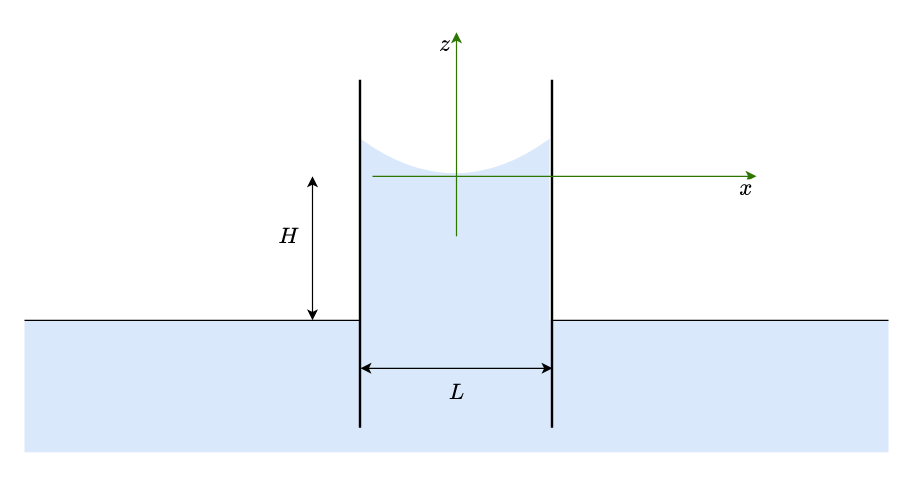

***